In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
file_path = 'Fish.csv'
fish_data = pd.read_csv(file_path)
print(fish_data.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


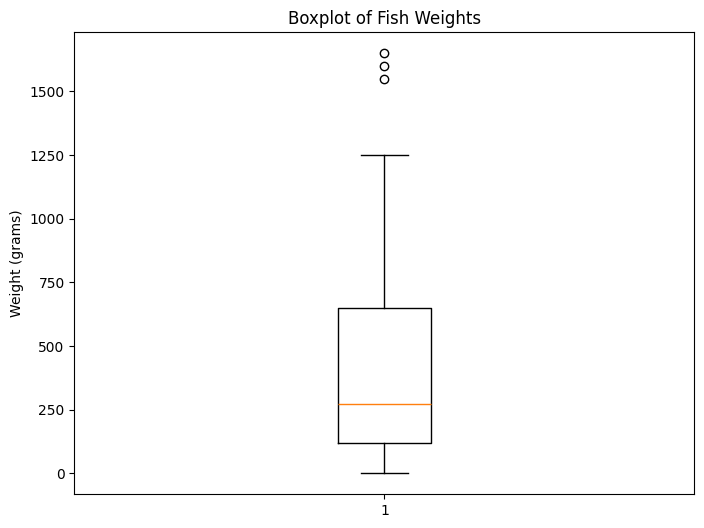

In [86]:
weights = fish_data['Weight']

# Creating a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(weights)
plt.title('Boxplot of Fish Weights')
plt.ylabel('Weight (grams)')
plt.show()

#### Data Preparation


In [87]:
print("Shape of the dataset before cleaning:", fish_data.shape)

Shape of the dataset before cleaning: (159, 7)


In [88]:
fish_data = fish_data[fish_data['Weight'] <= 1250]

# Verify the changes
print("Shape of DataFrame after removing weights > 1250:", fish_data.shape)

Shape of DataFrame after removing weights > 1250: (156, 7)


In [89]:
missing_values = fish_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [90]:
fish_data = fish_data[fish_data['Weight'] != 0]
fish_data.reset_index(drop=True, inplace=True)
print("Shape of the dataset after removing rows with zero weight:", fish_data.shape)

Shape of the dataset after removing rows with zero weight: (155, 7)


In [91]:
fish_data.dropna(inplace=True)
fish_data.reset_index(drop=True, inplace=True)
print("Shape of the dataset after removing null values:", fish_data.shape)

Shape of the dataset after removing null values: (155, 7)


#### Task 1

In [92]:
# One-hot encoding on the Species column
fish_encoded = pd.get_dummies(fish_data, columns=['Species'], drop_first=True)

In [93]:
# Define features (X) and target (y)
X = fish_encoded[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish']]
y = fish_encoded['Weight']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

###### Linear Regression

In [94]:
# Initialize the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict on the testing data
y_pred_lr = model_lr.predict(X_test)

#Calculate RMSE and R2
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse__lr = np.sqrt(mse_lr)
print(f"Linear Regression RMSE: {rmse__lr}")
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R^2 Score: {r2_lr}")

Linear Regression RMSE: 96.0454070041583
Linear Regression R^2 Score: 0.9244075815163131


In [95]:
# Initialize the Random Forest model
model_rf = RandomForestRegressor(random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

#Calculate RMSE and R2
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest RMSE: {rmse_rf}")
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R^2 Score: {r2_rf}")

Random Forest RMSE: 63.00327400830815
Random Forest R^2 Score: 0.9674724558774679


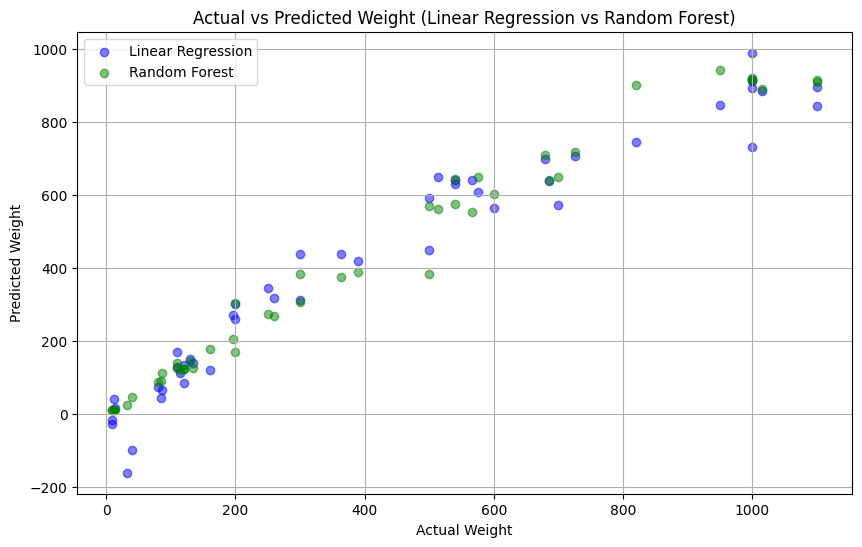

In [96]:
# Plotting y_pred vs y_test to visualize predictions
plt.figure(figsize=(10, 6))

# Scatter plot for Linear Regression
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5, label='Linear Regression')

# Scatter plot for Random Forest
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label='Random Forest')

plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight (Linear Regression vs Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

##### Compare the performance of the models

From the scatter plot, we can notice that Random forest is more accurate than Liner regression, and especially for smaller values (in our case smaller fishes)

And we can notice that for the weights of 800 and below random forest is more accurate than when the weights are more than 800, this could be because of the training dataset doesn't cotntains much data for fishes with high weight

Another thing to notice is that we didn't split the data based on fish species, for example Pike may weights 1650 grams, but Smelt is below 20 grams, that could affect the training process

The RMSE value of the Random Forest model  63.0 suggests its predictions are closer to the real weights, on average, compared to Linear Regression. It also has a higher R² score of 0.96 which means it covers about 96.7% of the variation in fish weights, showing it fits the data better than Linear Regression.

#### Task 2

In [97]:
# Group by species
grouped = fish_data.groupby('Species')

train_data = []
test_data = []

# Iterate over each species group
for species, group in grouped:
    X_train_species, X_test_species, y_train_species, y_test_species = train_test_split(
        group[['Length1', 'Length2', 'Length3', 'Height', 'Width']], 
        group['Weight'], 
        test_size=0.3, 
        random_state=100
    )
    
    train_data.append(pd.concat([X_train_species, y_train_species], axis=1))
    test_data.append(pd.concat([X_test_species, y_test_species], axis=1))

# Concatenate all data back together for final training and testing sets
train_df = pd.concat(train_data)
test_df = pd.concat(test_data)

# Verify the shapes of the final train and test sets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (105, 6)
Testing set shape: (50, 6)


In [98]:
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target variable
X_train = train_df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y_train = train_df['Weight']
X_test = test_df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y_test = test_df['Weight']

# Initialize the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression R^2 Score: {r2_lr}")


Linear Regression RMSE: 103.79157503728364
Linear Regression R^2 Score: 0.8979498862794648


In [99]:

# Initialize the Random Forest model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

Random Forest RMSE: 42.67127921705653
Random Forest R^2 Score: 0.9827511314237218


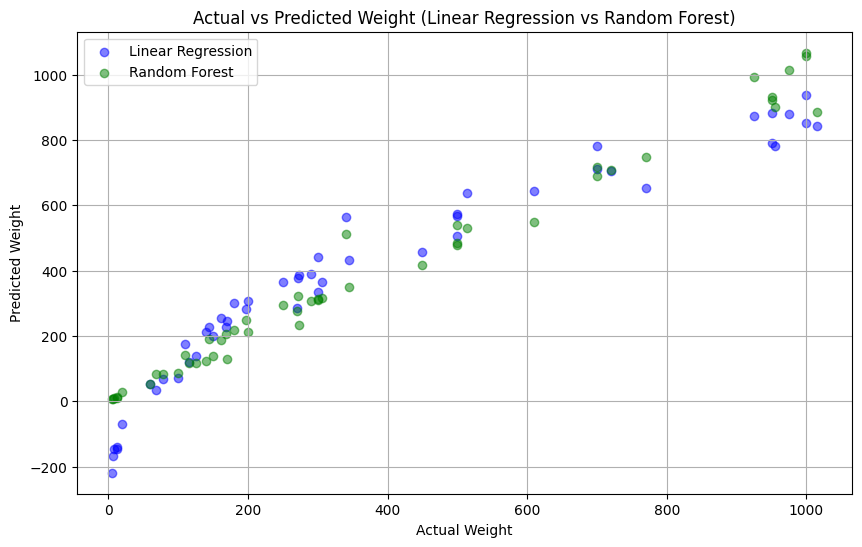

In [100]:
# Plotting y_pred vs y_test to visualize predictions
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5, label='Linear Regression')

plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label='Random Forest')

plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight (Linear Regression vs Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

Random forest gives better resutls with RMSE: 42.671 , and R^2 Score: 0.98 . and we can notice from the scatter plot that The best results we get for values between 0 and 800 , This is because most of the samples used in training fall within this range, while the number of samples with a weight of greater than 800 is relatively small. 

For liner regression we got also negative values , but the accuracy in general is not good as previous in TASK 1. 

After reviweing the dataset , I found that Whitefish for example has only 6 samples , and Parkki has 11 samples , while Perch has 55 samples. 

This big difference in samples count for each species explain why our model is not performing well 

### Comparison

Task 2 gives better results for random forest, but liner regression is performing worst. 

As I mentioned before, having different species with different number of samples for each specie in the dataset affects the training process and the results.

### Extra Point
In my openion the major paramter which could affect the model performance is the number of samples in general (our dataset is relativly small , 160 samples), and having few samples for some species makes the model performing not good , because some species in general can have high weight while the other have small weight
  